### Imports

In [25]:
from mppca import MPPCA
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris,load_breast_cancer,load_wine
from sklearn.decomposition import PCA

##### The goal is to generate synthetic data to test if MPPCA is actually working.

## 2D Case

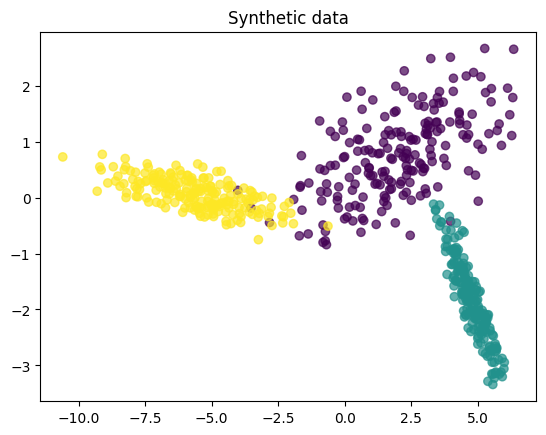

In [ ]:
import torch
import matplotlib.pyplot as plt

def generate_synthetic_mppca(N_per_cluster=100, K=3, d=5, q=2, sigma=0.1, seed=42):
    """
    Generate synthetic data to test an MPPCA model.

    Arguments:
        N_per_cluster (int) : Number of points per component
        K (int)             : Number of mixture components
        d (int)             : Dimension of the observed space
        q (int)             : Latent dimension
        sigma (float)       : Standard deviation of Gaussian noise
        seed (int)          : Random seed for reproducibility

    Returns:
        X (torch.Tensor)    : Data matrix (N, d)
        labels (torch.Tensor) : True component label for each point (N,)
        W_list (list of torch.Tensor) : W matrices used for each cluster
        mu_list (list of torch.Tensor) : Means used for each cluster
    """
    torch.manual_seed(seed)
    X_list = []
    labels_list = []
    W_list = []
    mu_list = []

    for k in range(K):
        # Means
        mu_k = torch.randn(d) * 5.0
        mu_list.append(mu_k)

        # Projection matrices
        W_k = torch.randn(d, q)
        W_list.append(W_k)

        # Generate latent variables
        Z = torch.randn(N_per_cluster, q)

        # Generate data points
        eps = sigma * torch.randn(N_per_cluster, d)
        X_k = Z @ W_k.T + mu_k + eps

        X_list.append(X_k)
        labels_list.append(torch.full((N_per_cluster,), k, dtype=torch.long))

    X = torch.cat(X_list, dim=0)
    labels = torch.cat(labels_list, dim=0)

    return X, labels, W_list, mu_list

Xtest, labels, W_list, mu_list = generate_synthetic_mppca(
    N_per_cluster=200, K=3, d=5, q=2, sigma=0.2
)

plt.scatter(Xtest[:,0], Xtest[:,1], c=labels, cmap='viridis', alpha=0.7)
plt.title("Synthetic data")
plt.show()


In [27]:
# GMM configuration
epochs = 3000
n_components = 2
k_mixtures = 3

pca = MPPCA(k_mixtures=3, n_components=2, max_iter=epochs,stopping_criterion=1e-12)
Xsolve, pred_labels = pca.fit_transform(Xtest)

MPPCA initialized with k_mixtures=3, n_components=2, method=em
Starting EM fitting on 3000 epochs...


EM - MPPCA:  10%|█         | 312/3000 [00:01<00:13, 204.59iter/s, loglik=-2621.71, [0.039571382105350494, 0.03750448301434517, 0.03407926484942436]] 


##### Projection in latent space

ARI (labellisation score): 1.0


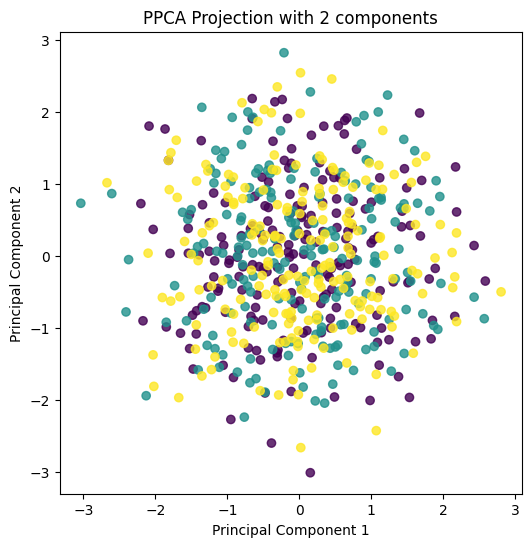

In [ ]:
### TEST: Latent variables are supposed to follow N(0,1). Is it the case?

from sklearn.metrics import adjusted_rand_score

fig, axs = plt.subplots(1, figsize=(14, 6))

scatter2 = axs.scatter(Xsolve[:, 0], Xsolve[:, 1],c=labels, cmap='viridis', alpha=0.8)
axs.set_title(f'PPCA Projection with {n_components} components')
axs.set_xlabel('Principal Component 1')
axs.set_ylabel('Principal Component 2')
axs.set_aspect("equal")

print("ARI (labellisation score):", adjusted_rand_score(pred_labels,labels))
plt.show()

## 3D Case

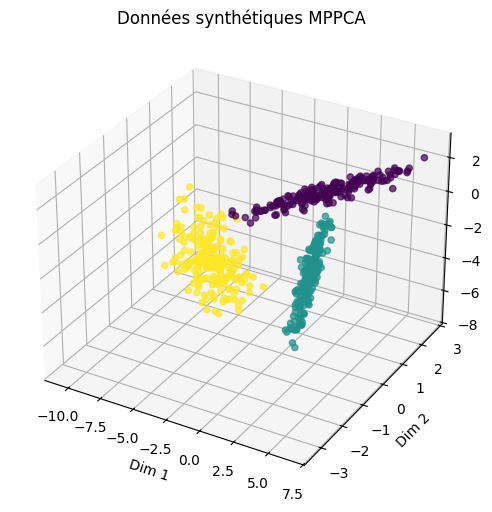

In [ ]:
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def generate_synthetic_mppca_3d(N_per_cluster=100, K=3, d=5, q=2, sigma=0.1, seed=42):
    """
    Generate synthetic data to test MPPCA.

    Arguments:
        N_per_cluster (int) : Number of points per component
        K (int)             : Number of mixture components
        d (int)             : Dimension of the observed space
        q (int)             : Latent dimension (for MPPCA)
        sigma (float)       : Standard deviation of Gaussian noise
        seed (int)          : Random seed for reproducibility

    Returns:
        X (torch.Tensor)    : Data matrix (N, d)
        labels (torch.Tensor) : True component for each point (N,)
        W_list (list of torch.Tensor) : W matrices used for each cluster
        mu_list (list of torch.Tensor) : Means used for each cluster
    """
    torch.manual_seed(seed)
    X_list = []
    labels_list = []
    W_list = []
    mu_list = []

    for k in range(K):
        mu_k = torch.randn(d) * 5.0
        mu_list.append(mu_k)

        W_k = torch.randn(d, q)
        W_list.append(W_k)

        Z = torch.randn(N_per_cluster, q)
        eps = sigma * torch.randn(N_per_cluster, d)
        X_k = Z @ W_k.T + mu_k + eps

        X_list.append(X_k)
        labels_list.append(torch.full((N_per_cluster,), k, dtype=torch.long))

    X = torch.cat(X_list, dim=0)
    labels = torch.cat(labels_list, dim=0)

    return X, labels, W_list, mu_list

Xtest, labels, W_list, mu_list = generate_synthetic_mppca_3d(
    N_per_cluster=200, K=3, d=5, q=2, sigma=0.2
)

# 3D Visualization
fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(Xtest[:,0], Xtest[:,1], Xtest[:,2], c=labels, cmap='viridis', alpha=0.7)
ax.set_title("Synthetic data for MPPCA")
ax.set_xlabel("Dim 1")
ax.set_ylabel("Dim 2")
ax.set_zlabel("Dim 3")
plt.show()


In [30]:
# Classic PCA configuration
epochs = 3000
n_components = 2
k_mixtures = 3

pca = MPPCA(k_mixtures=3, n_components=2, max_iter=epochs,stopping_criterion=1e-12)
Xsolve, pred_labels = pca.fit_transform(Xtest)

MPPCA initialized with k_mixtures=3, n_components=2, method=em
Starting EM fitting on 3000 epochs...


EM - MPPCA:  11%|█         | 323/3000 [00:01<00:13, 197.31iter/s, loglik=-2621.71, [0.039571382105350494, 0.03750448301434517, 0.03407926484942436]] 


ARI (clustering score): 1.0


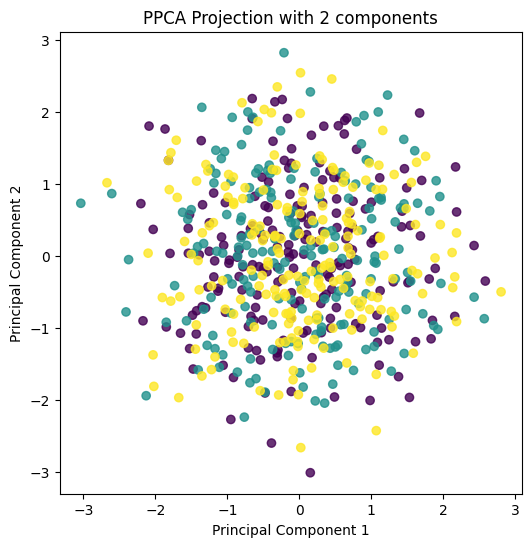

In [ ]:
### TEST: Latent variables are supposed to follow N(0,1). Is it the case?

from sklearn.metrics import adjusted_rand_score

fig, axs = plt.subplots(1, figsize=(14, 6))

scatter2 = axs.scatter(Xsolve[:, 0], Xsolve[:, 1],c=labels, cmap='viridis', alpha=0.8)
axs.set_title(f'PPCA Projection with {n_components} components')
axs.set_xlabel('Principal Component 1')
axs.set_ylabel('Principal Component 2')
axs.set_aspect("equal")

print("ARI (clustering score):", adjusted_rand_score(pred_labels,labels))

## Sampling with MPPCA

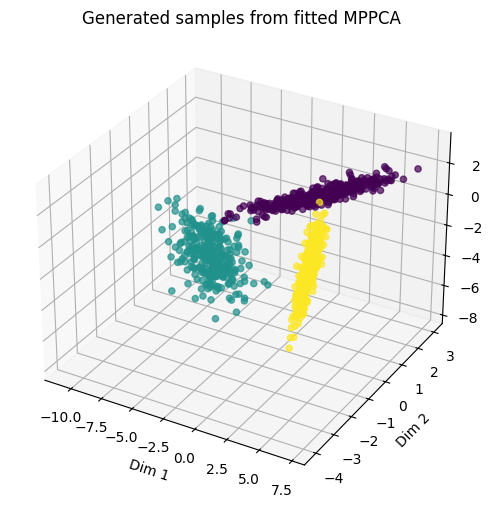

In [32]:
# Sampling from the previous 3D example
Xsamples, ysample = pca.sample(1000)


fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(Xsamples[:,0], Xsamples[:,1], Xsamples[:,2], c=ysample, cmap='viridis', alpha=0.7)
ax.set_title("Generated samples from fitted MPPCA")
ax.set_xlabel("Dim 1")
ax.set_ylabel("Dim 2")
ax.set_zlabel("Dim 3")
plt.show()